# FINAL PROJECT 1 : LINER REGRESSION

Nama Anggota Kelompok :
- MUHAMAD ADITYA DARMAWAN (PYTN-KS18-01)
- AUDITA BELLA INTAN PUSPITA (PYTN-KS18-05)
- IVANKA STELLA AUDRIA (PYTN-KS18-08)

# 1. Perkenalan
## LATAR BELAKANG
Kemajuan teknologi saat ini berlangsung dengan cepat dan dapat mengubah gaya hidup masyarakat yang telah ada sebelumnya. Teknologi ini memberikan kemudahan dalam berbagai aspek kehidupan, seperti mobilitas perjalanan. Kemudahan akses internet melalui smartphone di seluruh dunia telah mendorong perkembangan layanan transportasi online. Pada tahun 2018, New York mencatat peningkatan yang signifikan dalam aktivitas bisnis dan juga meraih peringkat teratas secara global dalam hal sumber daya manusia. Ini mengindikasikan bahwa New York telah menjadi salah satu kota yang memiliki pengaruh besar di seluruh dunia (Kearney, Laporan Global Cities 2018).

Uber dan Lyft adalah layanan transportasi online yang memungkinkan pengguna untuk memesan perjalanan dengan pengemudi melalui situs web atau aplikasi seluler. Uber adalah perusahaan global yang tersedia di 69 negara dan sekitar 900 kota di seluruh dunia. Di sisi lain, Lyft beroperasi di sekitar 644 kota di Amerika Serikat dan 12 kota di Kanada. Namun, di Amerika Serikat, Lyft adalah perusahaan ridesharing terbesar kedua dengan pangsa pasar 31%.

Dataset yang digunakan yaitu Uber vs Lyft Dataset New York, USA yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Dari 57 atribut, data yang diperlukan untuk proyek ini antara lain:
- Cab_type: Merek transportasi online (Uber, Lyft).
- Name: Jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- Hour: Pukul berapa transportasi online dipesan (24 jam).
- Day: Tanggal berapa transportasi online dipesan.
- Month: Bulan apa saja transportasi online dipesan (bulan 11 dan 12).
- Source: Destinasi awal.
- Destination: Destinasi akhir.
- Price: Harga transportasi online (dollar US).
- Distance: Jarak yang ditempuh (km).
- Short_summary: Cuaca ketika transportasi online dipesan (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle).
- Temperature: Suhu ketika transportasi online dipesan (Celcius).
- Visibility: Jarak penglihatan.
- Surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.

### Objective
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep regression dengan linear regression serta mempersiapkan data untuk digunakan dalam model linear regression
- Dapat mengimplementasikan linear regression untuk membuat prediksi tarif harga taksi berdasarkan faktor signifikan yang mempengaruhinya
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga Taksi

# 2. Import Pustaka

In [1]:
# import pustaka yang dibutuhkan

# Library For DataFrame
import pandas as pd
import numpy as np

# Library for datetime
import datetime
import calendar

# Librart for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

# Library for analysis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
import pickle
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)


# 3. Data Loading

### Import Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# membaca dataset dengan format csv menggunakan pandas
df = pd.read_csv('/content/drive/MyDrive/dataset/fp1/rideshare_kaggle.csv')

In [10]:
# Menampilkan 10 data teratas pada data
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1545071112.14,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.50,0.44,1.00,42.21,-71.03,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.00,0.00,0.84,7.19,8.88,1545022800,8.32,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.32,335.80,1545048523,1545081282,0.33,0.02,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1543208580.20,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.50,1.08,1.00,42.35,-71.08,41.99,41.

In [11]:
# Menampilkan 10 data terbawah pada data
df.tail(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1543728484.00,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,15.00,1.61,1.00,42.35,-71.08,38.19,38.19,Overcast,Light rain until evening.,0.00,0.00,0.83,2.07,3.50,1543755600,9.70,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.70,269.80,1543751798,1543785242,0.86,0.09,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1543728484.00,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.00,1.61,1.00,42.35,-71.08,38.19,38.19,Overcast,Light rain until evening.,0.00,0.00,0.83,2.07,3.50,1543755600,9.70,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.70,269.80,1543751798,1543785242,0.86,0.09,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1543728484.00,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.00,1.61,1.00,42.35,-71.08,38.19,38.19,Overcast,Light rain until evening.,0.00,0.00,0.83,2.07,3.50,1543755600,9.70,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.70,269.80,1543751798,1543785242,0.86,0.09,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1543728484.00,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.00,1.00,1.00,42.35,-71.08,38.19,38.19,Overcast,Light rain until evening.,0.00,0.00,0.83,2.07,3.50,1543755600,9.70,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.70,269.80,1543751798,1543785242,0.86,0.09,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.50,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1543708386.00,23,1,12,201

### Type of Data

In [12]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### View Statistical Data

In [13]:
# Melihat Informasi lebih detail mengenai struktur DataFrame untuk kolom numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [14]:
# Melihat Informasi lebih detail mengenai struktur DataFrame kolom kategorikal (objek)
df.describe(include=object).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


### Calculate Unique Values

In [15]:
# Menghitung nilai unique pada data
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

### Check Missing Values

In [16]:
# Mengecek missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari data tersebut, terdapat nilai missing value sebanyak 55095 pada colum price. Selanjutnya dilakukan penanganan missing value tersebut pada section data cleaning.

### Check the same data

In [18]:
# Mengecek data duplikat
df.duplicated().sum()

0

# 4. Data Cleaning

### Handling Missing Values

In [19]:
# Menghapus baris yang terdapat missing values
df_clean=df.dropna()
df_clean.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


In [20]:
# Mengecek missing values
df_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [21]:
# Melakukan crosstab pada kolom cab_type dan name
pd.crosstab(df_clean.cab_type, df_clean.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


In [22]:
# Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru
col_group = [
    "cab_type",
    "name",
    "hour",
    "day",
    "month",
    "source",
    "destination",
    "price",
    "distance",
    "short_summary",
    "windSpeed",
    "temperature",
    "visibility",
    "surge_multiplier"
]

df_group = df_clean[col_group]
df_group.head(3)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,42.34,10.00,1.00
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,43.58,4.79,1.00
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,38.33,10.00,1.00


Dari jumlah kolom yang ada diambil beberapa kolom yang diperlukan oleh case project ini, diantaranya:

- cab_type,
- name,
- hour,
- day,
- month,
- source,
- destination,
- price,
- distance,
- short_summary,
- windSpeed,
- temperature,
- visibility,
- surge_multiplier


In [23]:
# Melihat total baris dan kolom pada df_group
df_group.shape

(637976, 14)

### Rename Columns

In [24]:
# Mengganti nama kolom
df_group.rename(columns={
    "cab_type": "transport_name",
    "name": "kind",
    "hour": "time",
    "source": "start",
    "destination": "finish",
    "short_summary": "weather",
    "day" : "day",
    "temperature" : "temperature"}, inplace=True)

<ipython-input-24-6fc852f3932a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.rename(columns={


*Keterangan*

Selanjutnya melakukan rename beberapa kolom agar lebih mempermudah dalam melakukan pengerjaan, berikut ini adalah kolom yang dilakukan penggantian nama:

- "cab_type": "transport_name",
- "name": "kind",
- "hour": "time",
- "source": "start",
- "destination": "finish",
- "short_summary": "weather"

In [25]:
# Menampilkan 3 baris teratas
df_group.head(3)

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,42.34,10.00,1.00
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,43.58,4.79,1.00
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,38.33,10.00,1.00


In [26]:
# Mengganti isi data
df_group.loc[df_group["kind"] == "Taxi", "kind"] = "Uber Taxi"
df_group.loc[df_group["kind"] == "Lyft", "kind"] = "Lyft Taxi"

In [27]:
# Membuat variabel baru df_copy untuk menampung nilai dari df_group
df_copy = df_group.copy()

# Melihat data df_copy
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,42.34,10.00,1.00
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,43.58,4.79,1.00
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,38.33,10.00,1.00
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.00,0.44,Clear,5.28,34.38,10.00,1.00
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.00,0.44,Partly Cloudy,9.14,37.44,10.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00
693066,Uber,UberXL,23,1,12,West End,North End,13.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00
693067,Uber,UberX,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00
693069,Uber,Black SUV,23,1,12,West End,North End,27.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00


In [28]:
# Membuat Fungsi Rute
def rate(df_copy):
    # Jika Cuaca Overcast
    if df_copy["weather"] == " Overcast ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Mostly Cloudy
    elif df_copy["weather"] == " Mostly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Partly Cloudy
    elif df_copy["weather"] == " Partly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Light Rain
    elif df_copy["weather"] == " Light Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Rain
    elif df_copy["weather"] == " Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*3, 2)
    # Jika Cuaca Possible Drizzle
    elif df_copy["weather"] == " Possible Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Foggy
    elif df_copy["weather"] == " Foggy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Drizzle
    elif df_copy["weather"] == " Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Clear
    else:
        hasil = round(df_copy["price"]/df_copy["distance"], 2)
    return hasil

df_copy["rate"] = df_copy.apply(rate, axis=1)

In [29]:
# Melihat data df_copy
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,42.34,10.00,1.00,22.73
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,43.58,4.79,1.00,75.00
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,38.33,10.00,1.00,15.91
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.00,0.44,Clear,5.28,34.38,10.00,1.00,59.09
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.00,0.44,Partly Cloudy,9.14,37.44,10.00,1.00,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,14.25
693066,Uber,UberXL,23,1,12,West End,North End,13.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,19.50
693067,Uber,UberX,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,14.25
693069,Uber,Black SUV,23,1,12,West End,North End,27.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,40.50


*Keterangan*

Tarif (rate):
- Overcast = 1,5
- Mostly Cloudy = 2
- Partly Cloudy = 1,5
- Clear = 1
- Light Rain = 2,5
- Rain = 3
- Possible Drizzle = 2
- Foggy = 2
- Drizzle = 2,5

In [30]:
# Menampilkan informasi data pada dataframe df_copy

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transport_name    637976 non-null  object 
 1   kind              637976 non-null  object 
 2   time              637976 non-null  int64  
 3   day               637976 non-null  int64  
 4   month             637976 non-null  int64  
 5   start             637976 non-null  object 
 6   finish            637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   weather           637976 non-null  object 
 10  windSpeed         637976 non-null  float64
 11  temperature       637976 non-null  float64
 12  visibility        637976 non-null  float64
 13  surge_multiplier  637976 non-null  float64
 14  rate              637976 non-null  float64
dtypes: float64(7), int64(3), object(5)
memory usage: 77.9+ MB


Data sudah clean dengan perbandingan awal besaran data yaitu 301,4 MB, menjadi 82,7 MB

### Route Identification

In [31]:
# Membuat kolom route berisi data dari start sampai finish
df_copy["route"] = df_copy["start"] + "-" + df_copy['finish']
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,42.34,10.00,1.00,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,43.58,4.79,1.00,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,38.33,10.00,1.00,15.91,Haymarket Square-North Station
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.00,0.44,Clear,5.28,34.38,10.00,1.00,59.09,Haymarket Square-North Station
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.00,0.44,Partly Cloudy,9.14,37.44,10.00,1.00,30.68,Haymarket Square-North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,14.25,West End-North End
693066,Uber,UberXL,23,1,12,West End,North End,13.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,19.50,West End-North End
693067,Uber,UberX,23,1,12,West End,North End,9.50,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,14.25,West End-North End
693069,Uber,Black SUV,23,1,12,West End,North End,27.00,1.00,Partly Cloudy,2.34,37.05,9.79,1.00,40.50,West End-North End


# 5. Data Exploration

In [32]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df_copy.describe()

,time,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier,rate
count,637976.00,637976.00,637976.00,637976.00,637976.00,637976.00,637976.00,637976.00,637976.00,637976.00
mean,11.62,17.80,11.59,16.55,2.19,6.19,39.58,8.47,1.02,16.52
std,6.95,9.98,0.49,9.32,1.14,3.15,6.73,2.60,0.10,25.36
min,0.00,1.00,11.00,2.50,0.02,0.45,18.91,0.72,1.00,0.56
25%,6.00,13.00,11.00,9.00,1.27,3.41,36.45,8.43,1.00,7.45
50%,12.00,17.00,12.00,13.50,2.16,5.91,40.49,9.88,1.00,12.25
75%,18.00,28.00,12.00,22.50,2.93,8.41,43.58,10.00,1.00,19.62
max,23.00,30.00,12.00,97.50,7.86,15.00,57.22,10.00,3.00,3437.50


*Diperoleh beberapa info seperti berikut:*

- Rata rata harga yang dikeluarkan untuk menggunakan layanan jasa sekitar 16.5 Dollar.
- Tarif paling murah sekitar 2.5 dollar untuk 0.02 miles.
- Rata rata temperatur saat pemesanan layanan jasa sekitar 39.58 derajat F.

#### *Explore transport_name*

In [33]:
#Membuat variabel df_transport_name berisi total data dari kolom transport_name
df_transport_name = df_copy['transport_name'].value_counts()
df_transport_name

Uber    330568
Lyft    307408
Name: transport_name, dtype: int64

#### *Plot transport_name*

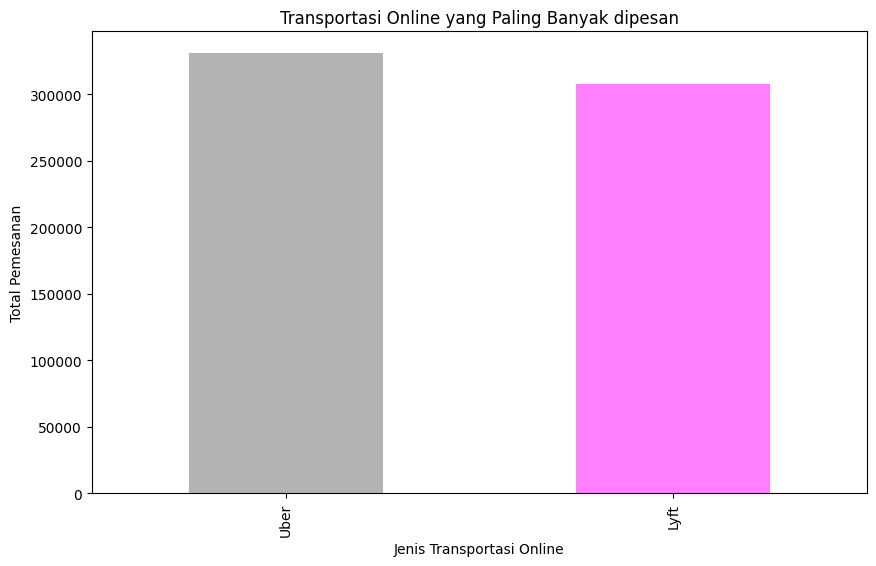

In [34]:
#Memvisualisasikan kolom transport_name dalam bentuk bar charts
df_transport_name.plot(kind='bar', figsize=(10,6), color=['dimgrey','magenta'], alpha=0.5)

plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Total Pemesanan')
plt.title('Transportasi Online yang Paling Banyak dipesan')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari hasil bar chart di atas, dapat diketahui bahwa transportasi online yang paling banyak dipesan oleh penumpang adalah Uber dengan total penumpang 330568 dan Lyft dengan total penumpang 307408.

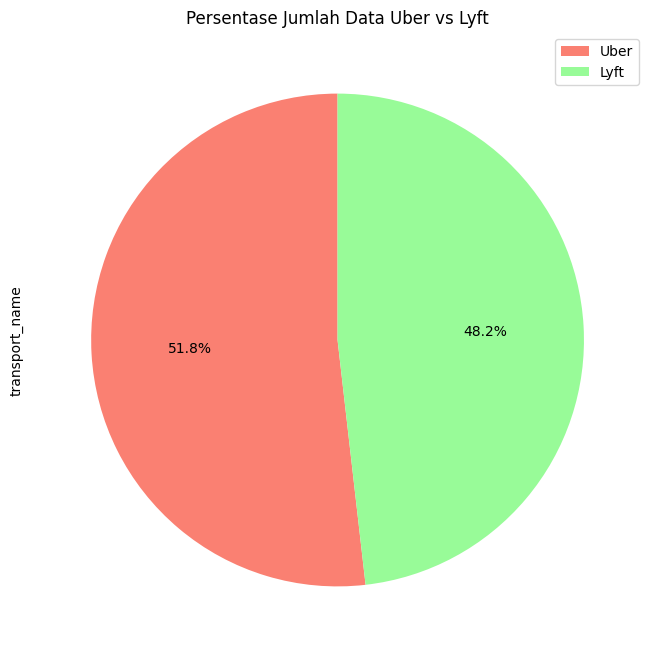

In [35]:
# Memvisualisasikan kolom transport_name dalam bentuk pie chart
pie_color=['salmon','palegreen']
df_transport_name.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", labels=None, colors=pie_color)
plt.title('Persentase Jumlah Data Uber vs Lyft')
plt.legend(labels=df_transport_name.index)

# Save Plot
plt.savefig("transport_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari hasil pie chart di atas, dapat diketahui bahwa persentase jumlah data pada Uber adalah 51.8% dan Lyft adalah 48.2%. Ini membuktikan bahwa Uber dan Lyft memiliki data yang signifikan.

#### *Explore kind*

In [36]:
# Melihat jenis layanan yang ditawarkan oleh Lyft
df_kind_Lyft = pd.DataFrame(df_copy[(df_copy['transport_name']=='Lyft')].groupby(['kind'])['kind'].count())
df_kind_Lyft

,kind
kind,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft Taxi,51235
Lyft XL,51235
Shared,51233


In [37]:
# Mengubah menjadi numerik
df_num_kind = pd.DataFrame(df_copy.groupby(["transport_name"])["kind"].value_counts())
df_num_kind

kind
transport_name kind               
Lyft           Lux           51235
               Lux Black     51235
               Lux Black XL  51235
               Lyft Taxi     51235
               Lyft XL       51235
               Shared        51233
Uber           Black SUV     55096
               UberXL        55096
               WAV           55096
               Black         55095
               UberX         55094
               UberPool      55091

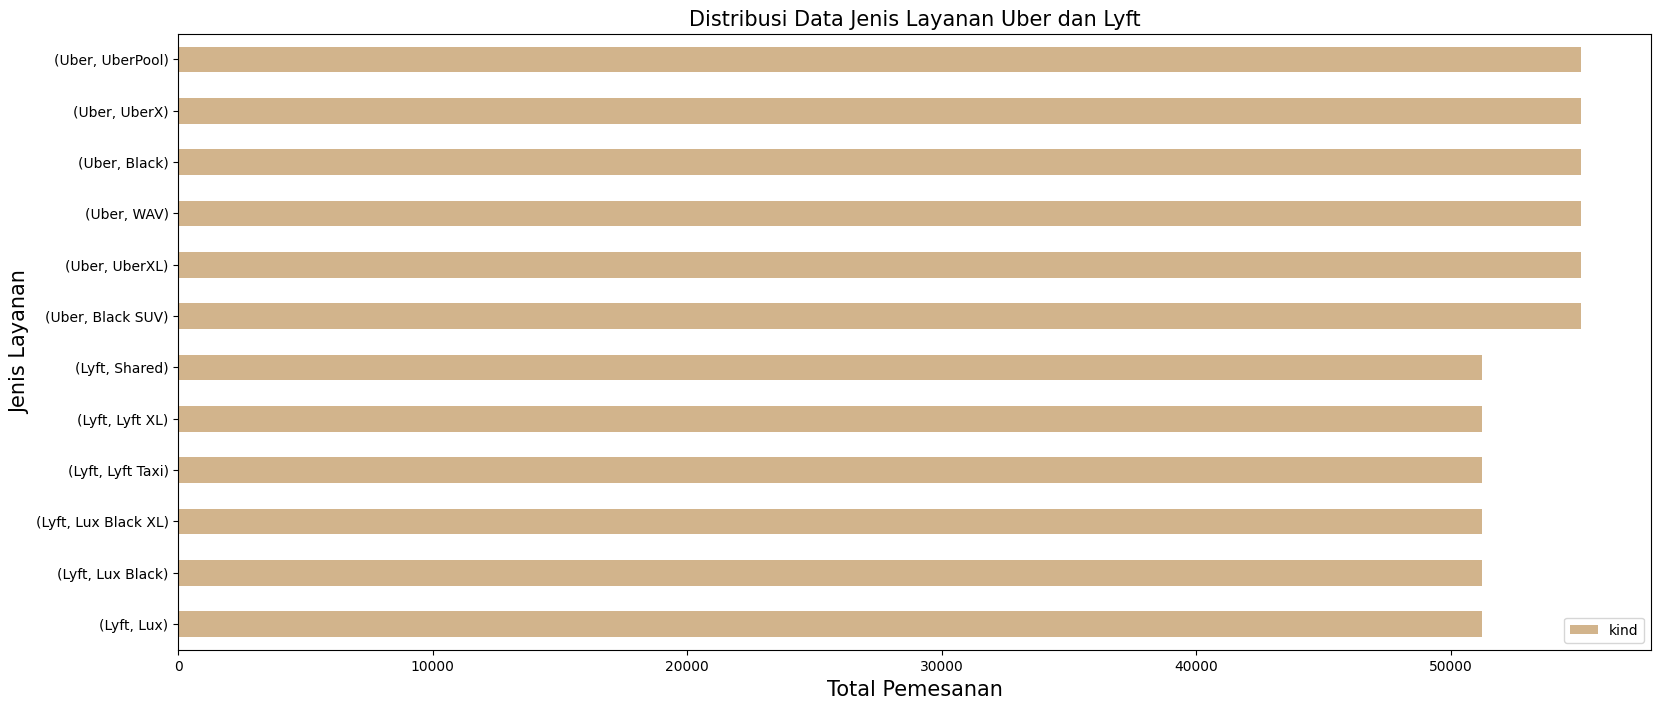

In [38]:
# Memvisualiasikan kolom transport_name dan kind berdasarkan total kind
df_num_kind.plot(kind="barh", figsize=(19,8), color='tan')

plt.title("Distribusi Data Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Layanan", fontsize=15)
plt.xlabel("Total Pemesanan", fontsize=15)

# Save Plot
plt.savefig("kind_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari bar chart di atas, dapat diketahui bahwa Uber dengan semua tipe layanan (UberPool, UberX, Black, WAV, UberXL, dan Black SUV) memiliki data yang signifikan. Begitu pula dengan Lyft.

#### *Explore weather*

In [39]:
# Melihat nilai unique pada kolom weather
df_copy['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [40]:
# Membuat dataframe yang berisi jumlah data penumpang berdasarkan cuaca
df_weather=pd.DataFrame(df_copy.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,inplace=True)
df_weather['weather']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
df_weather=df_weather.set_index('weather')
df_weather

,value
weather,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [41]:
# Menyiapkan dataframe untuk ploting pie chart
df_weather_max=pd.DataFrame(df_copy.groupby(['weather','transport_name']).max()['distance'].sort_values())
df_weather_max=df_weather_max.rename(columns={'transport_name':'value'})
df_weather_max

,,distance
weather,transport_name,
Drizzle,Lyft,5.44
Foggy,Lyft,5.86
Possible Drizzle,Lyft,6.04
Partly Cloudy,Lyft,6.09
Light Rain,Lyft,6.13
Clear,Lyft,6.14
Overcast,Lyft,6.33
Rain,Lyft,6.33
Mostly Cloudy,Lyft,6.33


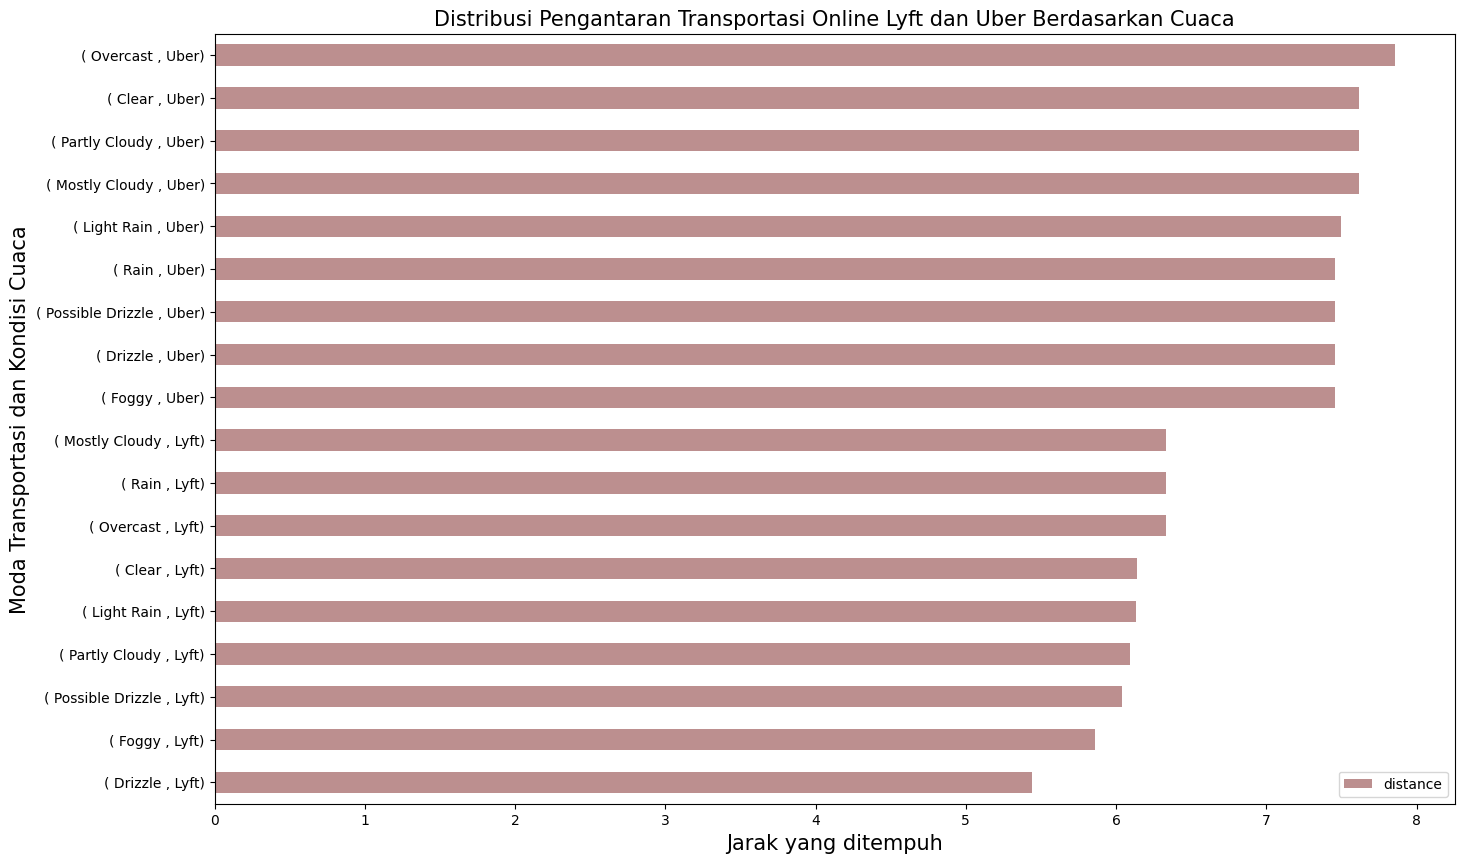

In [42]:
#Memvisualisasikan kolom weather dengan transport_name dalam bentuk horizontal bar charts
df_weather_max.plot(kind="barh", figsize=(16,10), color='rosybrown')

plt.title("Distribusi Pengantaran Transportasi Online Lyft dan Uber Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Moda Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Jarak yang ditempuh", fontsize=15)

# Save Plot
plt.savefig("weather_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

#### *Kesimpulan:*

Dari bar chart di atas, dapat diketahui ketika cuaca sedang mendung, Uber mengantar penumpang dengan jarak yang ditempuh maksimal sejauh 7.86 km. Sedangkan Lyft dengan cuaca berawan, jarak yang ditempuh maksimal sejauh 6.33 km.

In [43]:
#Membuat variabel cuaca dan trans untuk mendukung data cuaca yang akan divisualisasikan dalam bentuk pie charts
cuaca = df_copy['weather'].value_counts()
trans = pd.DataFrame(data=cuaca.index, columns=["weather"])
trans['values'] = cuaca.values

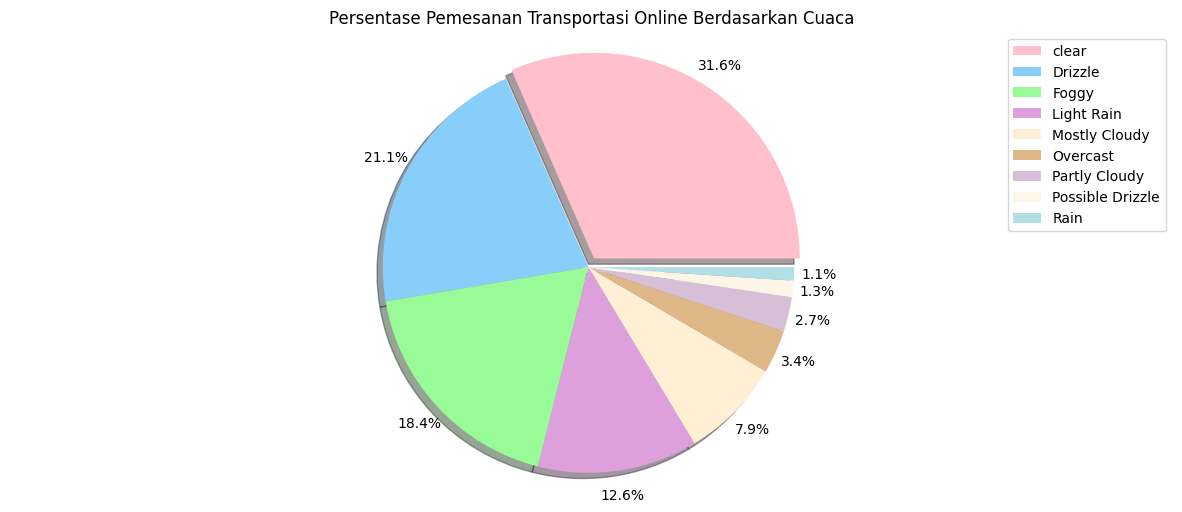

In [44]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0,0,0,0,0,0,0,0]
color_list=['pink','lightskyblue','palegreen','plum','papayawhip','burlywood','thistle','oldlace','powderblue']
cuaca.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online Berdasarkan Cuaca')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=df_weather.index, loc='upper right')

# Save Plot
plt.savefig("weather_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari hasil di atas, dapat diketahui bahwa mayoritas penumpang menggunakan transportasi online ketika cuacanya cerah dengan persentase 31,6%.

#### *Explore Location (Route)*

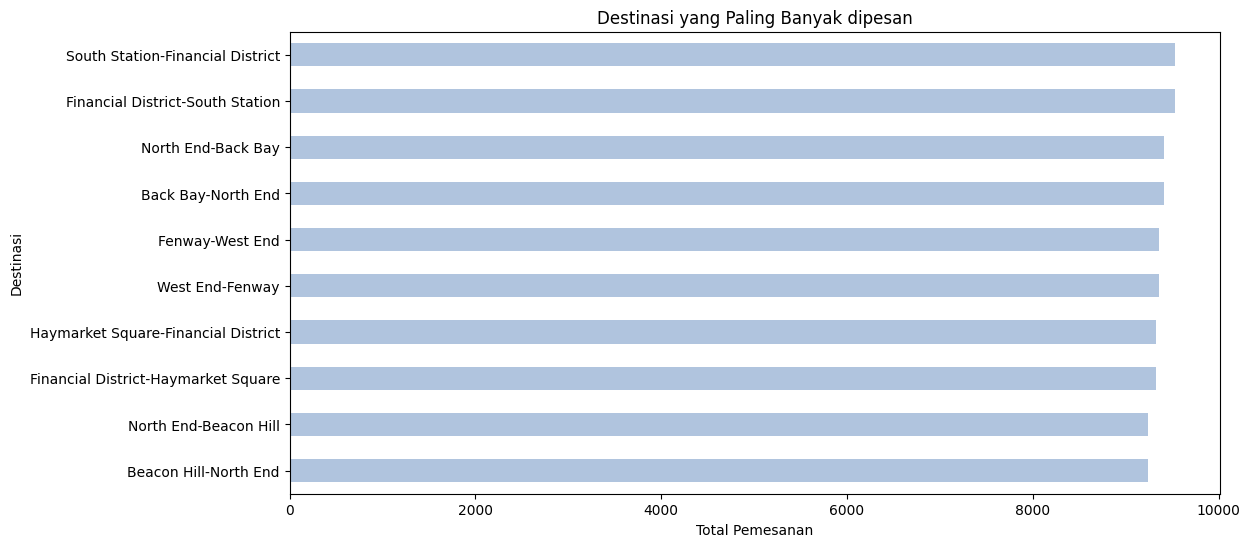

In [45]:
#Memvisualisasikan kolom route dalam bentuk horizontal bar charts
rute = df_copy['route'].value_counts()

rute_sort = rute[0:10].sort_values()
rute_sort.plot(kind='barh', figsize=(12,6), color='lightsteelblue')

plt.xlabel('Total Pemesanan')
plt.ylabel('Destinasi')
plt.title('Destinasi yang Paling Banyak dipesan')

# Save Plot
plt.savefig("route_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan :*
Dari hasil di atas, destinasi yang paling banyak dipesan yaitu dari South Station menuju Financial District dan sebaliknya dengan total 9534 kali.

#### *Explore Month*

In [46]:
# Membuat variabel bulan dan months untuk mendukung data month yang akan divisualisasikan dalam bentuk pie charts
bulan = df_copy['month'].value_counts()
months = pd.DataFrame(data=bulan.index, columns=["month"])
months['values'] = bulan.values

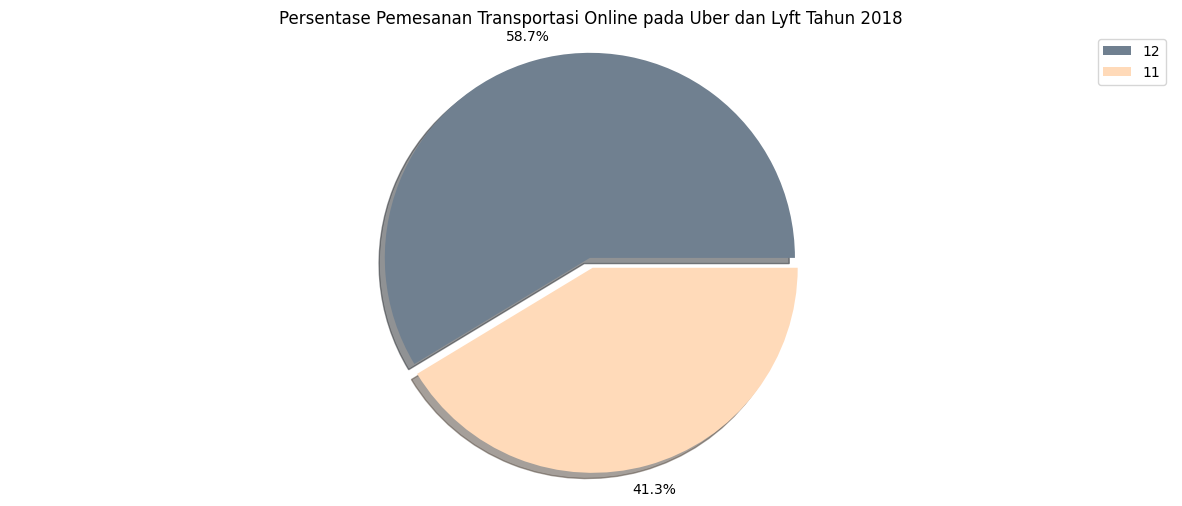

In [47]:
# Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0]
color_list=['slategrey','peachpuff']
bulan.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online pada Uber dan Lyft Tahun 2018')
plt.ylabel('')
plt.axis('equal')
plt.legend(bulan.index, loc='upper right')

# Save Plot
plt.savefig("month_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari hasil di atas, dapat diketahui bahwa dalam data hanya terdapat bulan November dan Desember. Artinya, hanya bulan tersebut yang direcord datanya. Bulan November mendapatkan hasil persentase sebesar 41.3% dan bulan Desember sebanyak 58.7%. Bulan Desember mendominasi pemesanan penumpang. Hal ini dikarenakan bulan Desember merupakan bulan liburan, sehingga banyak penumpang yang memesan transportasi online.

#### Correlation Matrix

<ipython-input-48-e148427e0d7a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="PuRd")


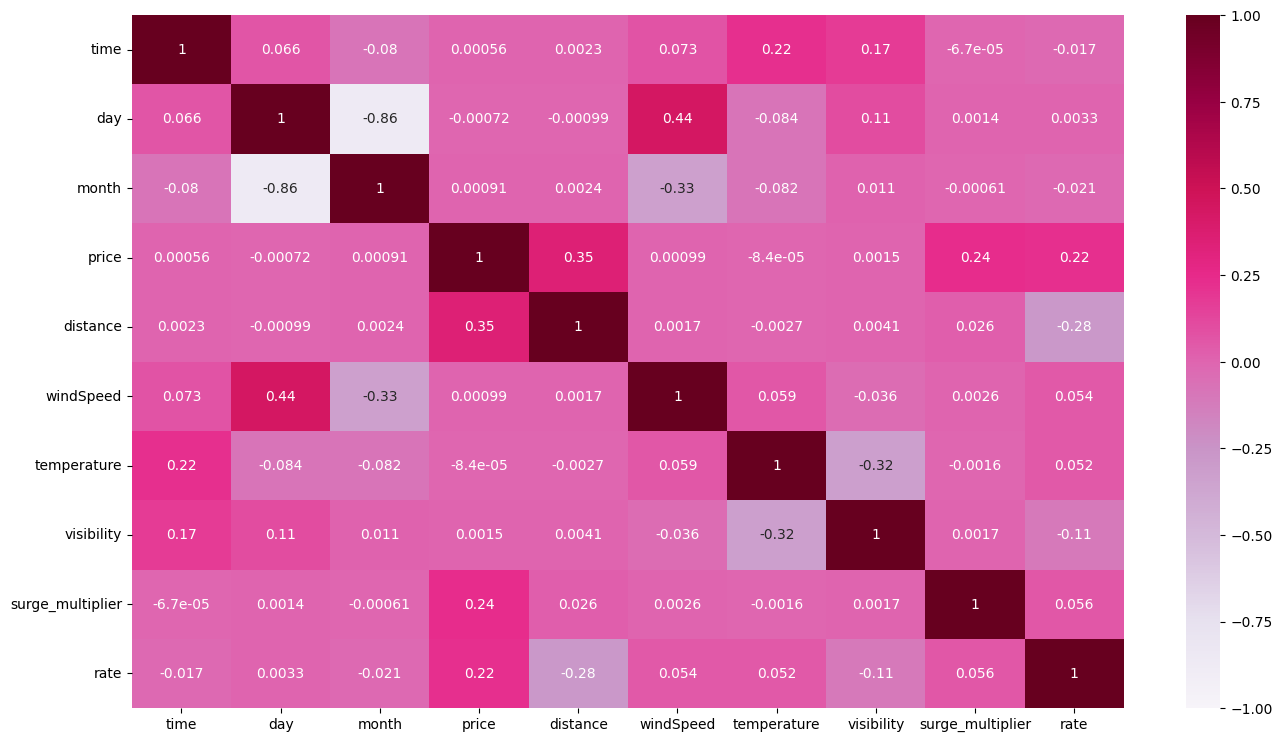

In [48]:
# Melihat korelasi antardata menggunakan heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="PuRd")

# Save Plot
plt.savefig("corr_heatmap.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

*Kesimpulan:*

Dari matriks korelasi didapatkan bahwa day dan temperature berkorelasi negatif dengan harga, sehingga 2 atribut ini tidak akan dipakai lagi sebagai variable pembanding harga dan data tersebut akan dihapus.

In [49]:
# Menghapus kolom day dan temperature
df_copy=df_copy.drop(['day','temperature'], axis=1)
df_copy.head(3)

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,12,Haymarket Square,North Station,5.00,0.44,Mostly Cloudy,8.66,10.00,1.00,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,11,Haymarket Square,North Station,11.00,0.44,Rain,11.98,4.79,1.00,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,11,Haymarket Square,North Station,7.00,0.44,Clear,7.33,10.00,1.00,15.91,Haymarket Square-North Station


# 6. Data Preprocessing

### Encoding

In [50]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=["transport_name", "kind", "time", "month", "start", "finish",
                                                  "price", "distance", "weather", "windSpeed", "visibility", "surge_multiplier", "rate", "route", ]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_rfe = encoding_pipeline.fit_transform(df_copy)

In [51]:
#Menampilkan 5 baris teratas pada df_rfe
df_rfe.head()

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,0,7,9,1,5,7,4,15,4,231,226,0,2197,33
1,0,2,2,0,5,7,20,15,8,274,57,0,5356,33
2,0,5,1,0,5,7,8,15,0,197,226,0,1519,33
3,0,4,4,0,5,7,53,15,0,141,226,0,4943,33
4,0,6,3,0,5,7,14,15,6,240,226,0,2976,33


In [52]:
#Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate
x_transform = df_rfe.drop(["price", "rate"], axis=1)

#Mencetak jumlah baris dan kolom pada variabel x_transform
print(x_transform.shape)

(637976, 12)


In [53]:
# Membuat variabel Y untuk menampung kolom price
Y=df_rfe['price']

#Mencetak jumlah baris dan kolom pada variabel y
print(Y.shape)

(637976,)


Setelah dilakukan encode, selanjutnya membuat feature selection menggunakan library sequantialfeatureselector dengan menggunakan LR. Di sini dilakukan pencarian 10 atribut yang paling berpengaruh dengan metode forward.

### Feature Selection

In [54]:
#Membuat variabel sfs untuk menampung hasil dari feature selection
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 3)

In [55]:
#Mencari 10 atribut yang paling berpengaruh
sfs.fit(x_transform, Y)
sfs.k_feature_names_

('transport_name',
 'kind',
 'time',
 'month',
 'start',
 'finish',
 'distance',
 'weather',
 'surge_multiplier',
 'route')

In [56]:
#Mencari dan mencetak 10 atribut yang paling berpengaruh beserta score-nya
x_transform = df_rfe.drop(['price', 'rate'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x_transform, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_transform.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs     Score
1               kind 347645.51
6           distance  90197.14
10  surge_multiplier  36103.65
0     transport_name   4369.20
5             finish   1448.09
11             route    589.70
4              start    413.21
7            weather      1.08
8          windSpeed      0.88
9         visibility      0.73


Didapatkan 10 atribut teratas untuk menjadi pembanding dari harga, karena nilai signifikan visibility terlalu kecil daripada atribut yang lain maka kita akan gunakan 8 atribut teratas untuk membuat model perkiraan harga yakni kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.

In [57]:
#Membuat variabel df_x yang berisi 8 atribut paling berpengaruh
X_fit=df_rfe[['transport_name','kind', 'start', 'finish', 'visibility','weather', 'distance','surge_multiplier']]

In [58]:
#Melihat data X_fit
X_fit

,transport_name,kind,start,finish,visibility,weather,distance,surge_multiplier
0,0,7,5,7,226,4,15,0
1,0,2,5,7,57,8,15,0
2,0,5,5,7,226,0,15,0
3,0,4,5,7,226,0,15,0
4,0,6,5,7,226,6,15,0
...,...,...,...,...,...,...,...,...
693065,1,11,11,6,135,6,71,0
693066,1,10,11,6,135,6,71,0
693067,1,9,11,6,135,6,71,0
693069,1,1,11,6,135,6,71,0


# 7. Model Defiation

Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu transport_name, kind, start, finish, visibility, weather, distance, surge_multiplier.

Metode pengujian yang akan digunakan pada project kali ini adalah metode Linear Regression dengan pembanding Random Forest. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.

Sedangkan Random Forest berfungsi karena menggabungkan prediksi dari beberapa algoritma machine learning untuk membuat prediksi yang lebih akurat daripada model individual. Ini menggunakan bias rendah dan varians tinggi untuk mengurangi kesalahan.

Ada berbagai metrics untuk mengukur kinerja model regresi, tetapi pada project ini menggunakan metrik R-squares dan RMSE (Root-mean-square-error) untuk menemukan model terbaik.

In [59]:
# Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2
X_train, X_test, Y_train, Y_test = train_test_split(
    X_fit, Y, test_size=0.20, random_state=350)

# 8. Pelatihan Model

In [60]:
# Membuat model Random Forest
model1 = RandomForestRegressor(n_estimators = 50, random_state = 15)

In [61]:
# Membuat model Decision Tree
model2 = DecisionTreeRegressor()

In [62]:
# Membuat model Linear Regression
model3 = LinearRegression()

# 9. Evaluasi Model

### Decision Tree Regressor

In [63]:
# Train model menggunakan training set
dt_model = model2.fit(X_train, Y_train)

In [64]:
# Membuat prediksi dari Decision Tree Model dan R-squared Scores

predictions_dt = dt_model.predict(X_test)
l_dt_train_r2 = model2.score(X_train,Y_train)
l_dt_test_r2 = model2.score(X_test, Y_test)
print('Decision Tree train R squared : %.4f' % l_dt_train_r2)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

Decision Tree train R squared : 0.9895
Decision Tree test R squared": 0.9466


In [65]:
# Mengukur tingkat error dengan Root Mean Squared Error (RMSE) pada Decision Tree Regressor

dt_mse = mean_squared_error(predictions_dt, Y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree Regressor RMSE: 4.8578


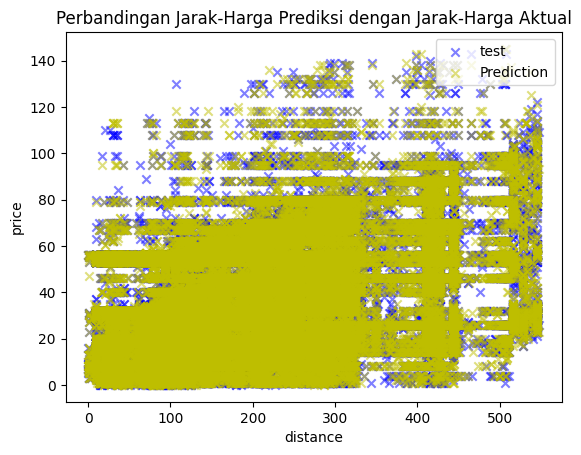

In [66]:
# Visualisasi data dengan menggunakan scatter plot

x_axis_dt = X_test.distance

plt.scatter(x_axis_dt, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis_dt, predictions_dt, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("decision_tree.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Random Forest Regressor

In [67]:
# Pemodelan Random Forest

rf_model = model1.fit(X_train, Y_train)

In [68]:
# Membuat prediksi dari model Random Forest dengan R-squared Scores

predictions_rf = rf_model.predict(X_test)
l_rf_train_r2 = model1.score(X_train,Y_train)
l_rf_test_r2 = model1.score(X_test, Y_test)
print('Random Forest train R squared : %.4f' % l_rf_train_r2)
print('Random Forest test R squared": %.4f' % l_rf_test_r2)

Random Forest train R squared : 0.9867
Random Forest test R squared": 0.9616


In [69]:
# Mengukur tingkat error dengan Root Mean Squared Error (RMSE) pada Random Forest Regressor

rf_mse = mean_squared_error(predictions_rf, Y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest Regression RMSE: %.4f' % rf_rmse)

Random Forest Regression RMSE: 4.1216


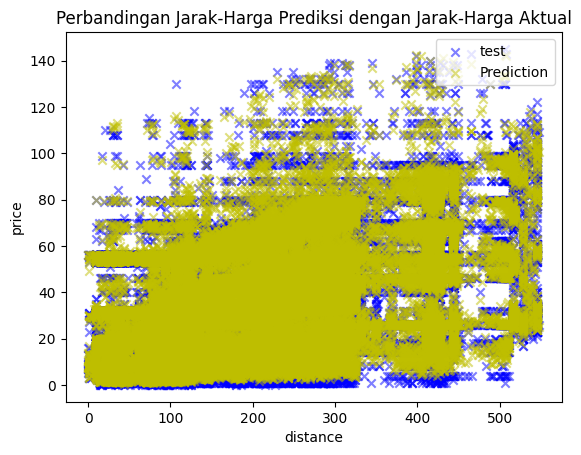

In [70]:
# Visualisasi data dengan menggunakan scatter plot

x_axis = X_test.distance

plt.scatter(x_axis, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, predictions_rf, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("random_forest.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### Linear Regression

In [71]:
# Pemodelan Regresi Liniear

lr_model = model3.fit(X_train, Y_train)

In [72]:
# Melihat nilai intercept

lr_model.intercept_

35.43884230627104

In [73]:
# Melihat nilai Koefisien

model3.coef_

array([ 5.40661229e+00, -3.71759782e+00,  6.92915323e-02,  4.42526418e-02,
       -1.05856591e-04,  1.12958845e-02,  6.62565918e-02,  1.12961592e+01])

In [74]:
# Membuat prediksi dari model Regression Linear dengan R-squared Scores

predictions_lr = lr_model.predict(X_test)
l_lr_train_r2 = model3.score(X_train,Y_train)
l_lr_test_r2 = model3.score(X_test, Y_test)
print('Linear Regression train R squared : %.4f' % l_lr_train_r2)
print('Linear Regression test R squared": %.4f' % l_lr_test_r2)

Linear Regression train R squared : 0.5239
Linear Regression test R squared": 0.5232


In [75]:
# Mengukur tingkat error dengan Root Mean Squared Error (RMSE) pada Linear Regression

lr_mse = mean_squared_error(predictions_lr, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 14.5194


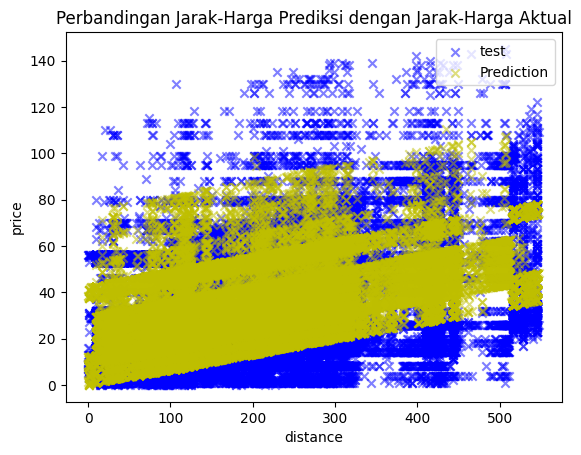

In [76]:
# Visualisasi data dengan scatter plot

x_axis = X_test.distance

plt.scatter(x_axis, Y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, predictions_lr, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc = 'upper right')

# Save Plot
plt.savefig("linear_regression.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

# 10. Model Inference

In [77]:
# Menampilkan indo data dari data frame X_Fit

X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   transport_name    637976 non-null  int64
 1   kind              637976 non-null  int64
 2   start             637976 non-null  int64
 3   finish            637976 non-null  int64
 4   visibility        637976 non-null  int64
 5   weather           637976 non-null  int64
 6   distance          637976 non-null  int64
 7   surge_multiplier  637976 non-null  int64
dtypes: int64(8)
memory usage: 43.8 MB


In [78]:
# Membuat sebuah dataframe yang bernama X_new

X_new = {'transport_name': [1, 2, 3], 'kind': [1, 2, 3], 'start': [1, 2, 3], 'finish': [1, 2, 3], 'visibility': [1, 2, 3], 'weather': [1.25, 2, 3], 'distance': [1, 2, 3],
         'surge_multiplier': [1, 2, 3]}
X_new = pd.DataFrame(X_new)

In [79]:
# Membuat prediksi dengan model Linier Regression pada dataframe X_new

y_pred5 = lr_model.predict(X_new)
print('Prediksi Tarif dengan model Linear Regression yaitu: ')
print(y_pred5)

Prediksi Tarif dengan model Linear Regression yaitu: 
[48.61783075 61.79117125 74.96733572]


In [80]:
# Membuat prediksi dengan model Random Forest pada dataframe X_new

y_pred6 = rf_model.predict(X_new)
print('Prediksi Tarif dengan model Random Forest Regression yaitu: ')
print(y_pred6)

Prediksi Tarif dengan model Random Forest Regression yaitu: 
[55.4  43.14 55.26]


In [81]:
# Membuat prediksi dengan model Decision Tree pada dataframe X_new

y_pred7 = dt_model.predict(X_new)
print('Prediksi Tarif dengan model Decision Tree Regressor yaitu: ')
print(y_pred7)

Prediksi Tarif dengan model Decision Tree Regressor yaitu: 
[55. 26. 56.]


# 11. Kesimpulan

In [82]:
# Menyimpan Model ke File Menggunakan Pickle

pickle.dump(rf_model, open('model_rf.pkl', "wb"))
pickle.dump(lr_model, open('model_lr.pkl', "wb"))
pickle.dump(dt_model, open('model_dt.pkl', "wb"))

Dari analisis di atas, dapat diambil beberapa kesimpulan:

1. Dari 57 atribut yang ada, diambil 8 atribut yang paling berpengaruh dalam prediksi harga taksi online, diantaranya kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.
2. Metode pengujian menggunakan 3 model, yaitu linear regression, random forest regression, dan decision tree regressor dengan masing - masing nilai akurasi 52.3%, 96.16% dan 94.66%
3. Model random forest regression adalah model yang paling optimal dengan RMSE sebesar 4.1216.